## Question 10

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.analysis_helpers import side_by_side_bar_plot, get_value_counts, distribution_plots
from scipy.stats import mannwhitneyu, kruskal, rankdata

In [179]:
def normalized_mean_rank(series, method="average"):
    """
    """
    rank_data = rankdata(series, method=method)
    max_rank_data = np.max(rank_data)
    return np.mean(rank_data) / max_rank_data
    

In [180]:
def franchise_analysis(df, franchise_name):
    """
    """

    # empty lists to hold movie names and movie data
    franchise_movies = []
    franchise_survey_data = []
    franchise_mean_normalized_ranks = []
    franchise_medians = []
    franchise_means = []

    # get all movies of same franchise
    for col in df.columns:
        if franchise_name in col:
            movie_data = df[col].copy().dropna()  # get data for movie
            franchise_movies.append(col)  # add column name to list
            franchise_survey_data.append(movie_data)  # add movie data to list
            franchise_mean_normalized_ranks.append(normalized_mean_rank(movie_data))
            franchise_medians.append(movie_data.median())
            franchise_means.append(movie_data.mean())
    
    # run test
    H, p = kruskal(*franchise_survey_data)

    # collate results into singular dictionary to return
    results = {
        "franchise": franchise_name,
        "movies": franchise_movies,
        "mean_normalized_ranks": franchise_mean_normalized_ranks,
        "median_ratings": franchise_medians,
        "average_ratings": franchise_means,
        "p": p,
        "H": H
    }

    return results

In [183]:
# Read in reviews data csv file
df = pd.read_csv("../data/movieReplicationSet.csv")

# list of franchises
franchises = [
    "Star Wars",
    "Harry Potter",
    "The Matrix",
    "Indiana Jones",
    "Jurassic Park",
    "Pirates of the Caribbean",
    "Toy Story",
    "Batman"
]

# empty lists to hold analysis results
Hvalues = []
pvalues = []

for movie_series in franchises:
    res = franchise_analysis(df, movie_series)
    Hvalues.append(res["H"])
    pvalues.append(res["p"])
    
    print(f"Franchise: {movie_series} \t # of Movies: {len(res['movies'])}")

df_results = pd.DataFrame({
    "Franchise": franchises,
    "p": pvalues,
    "H": Hvalues,
    #"Movies": movies_per_franchise
})

df_results

Franchise: Star Wars 	 # of Movies: 6
Franchise: Harry Potter 	 # of Movies: 4
Franchise: The Matrix 	 # of Movies: 3
Franchise: Indiana Jones 	 # of Movies: 4
Franchise: Jurassic Park 	 # of Movies: 3
Franchise: Pirates of the Caribbean 	 # of Movies: 3
Franchise: Toy Story 	 # of Movies: 3
Franchise: Batman 	 # of Movies: 3


,Franchise,p,H
0,Star Wars,8.016477e-48,230.584175
1,Harry Potter,3.433195e-01,3.331231
2,The Matrix,3.123652e-11,48.378867
3,Indiana Jones,6.272776e-10,45.794163
4,Jurassic Park,7.636930e-11,46.590881
5,Pirates of the Caribbean,3.290129e-05,20.643998
6,Toy Story,5.065805e-06,24.385995
7,Batman,4.225297e-42,190.534969


In [143]:
res["mean_normalized_ranks"]

[np.float64(0.6301726946888238),
 np.float64(0.7376381617219313),
 np.float64(0.8307315580042852)]

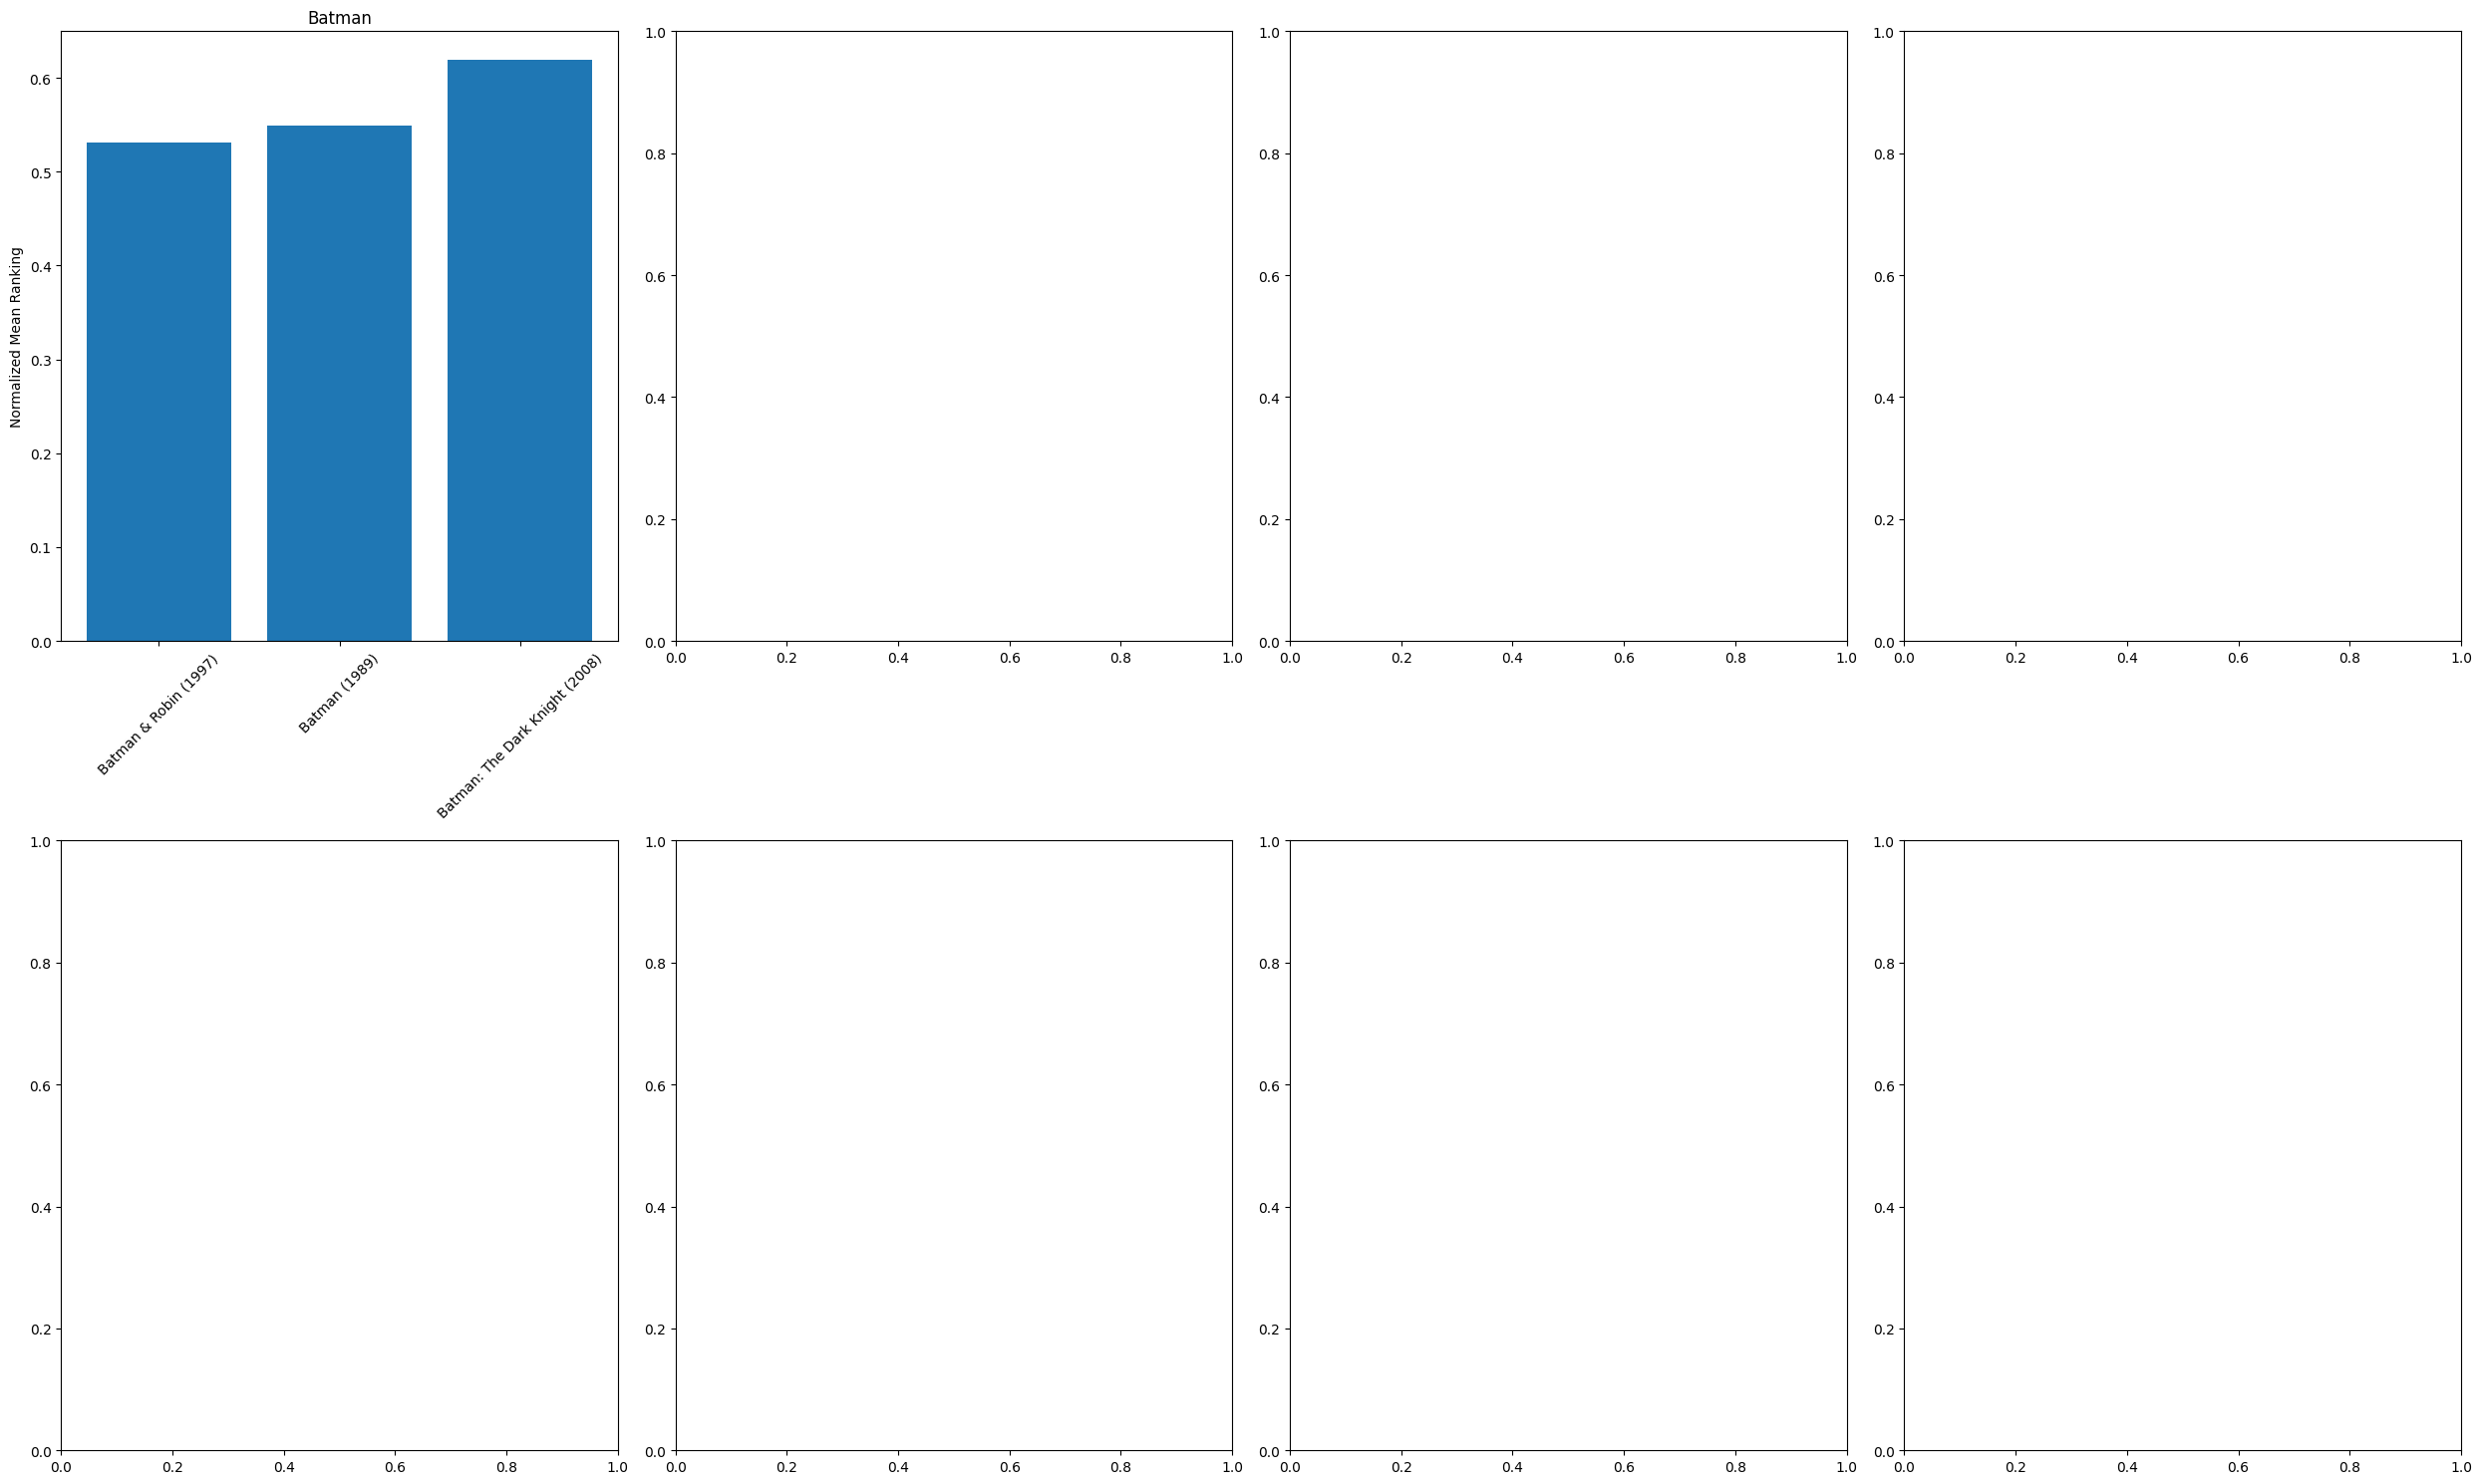

In [177]:
fig, ax = plt.subplots(2, 4, figsize = (25, 15))
ax[0, 0].bar(res["movies"], res["mean_normalized_ranks"])
ax[0, 0].tick_params(axis='x', labelrotation=45)
ax[0, 0].set_title(movie_series)
ax[0, 0].set_ylabel("Normalized Mean Ranking")
plt.tight_layout()
plt.show()

In [145]:
plt.figure((2, 4))

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'tuple'